In [1]:
%matplotlib notebook

from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (10.0, 10.0)

from matplotlib.patches import Circle
from matplotlib.cm import colors
from matplotlib import cm
from sklearn.linear_model import LogisticRegression
from tensorflow.examples.tutorials.mnist import input_data

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
# Load mnist data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


<IPython.core.display.Javascript object>


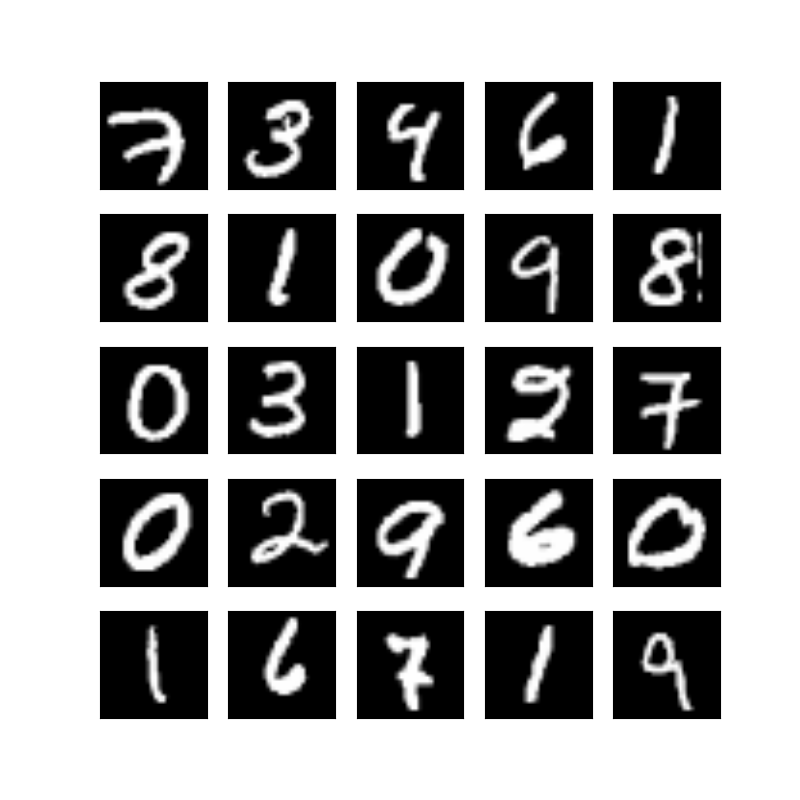

In [3]:
# Let us visualise what the data looks like. Although they are actually images 28x28 pixels
# we'll be using the data as vectors of length 784. So we'll need to reshape them to visualise

fig = plt.figure()
for i in range(25):
    i1 = i % 4
    i2 = i // 4
    ax = fig.add_subplot(5, 5, i + 1)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.imshow(mnist.train.images[i].reshape(28, 28), cmap='Greys_r')

### Define a Neural Network

We'll use one hidden layer with relu non-linearities and 500 hidden units.

We'll use softmax on the output layer and use cross entropy as loss function

In [4]:
# Set up placeholders
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

# Make the fully connected layer
W_1 = tf.Variable(tf.truncated_normal([784, 500], stddev=0.05))
b_1 = tf.Variable(tf.constant(0.1, shape=[500]))
h_1 = tf.nn.sigmoid(tf.matmul(x, W_1) + b_1)

# Make second fully connected layer
W_2 = tf.Variable(tf.zeros([500, 10]))
b_2 = tf.Variable(tf.zeros([10]))

# Predicted Class 
y = tf.matmul(h_1, W_2) + b_2

# Loss function
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_))
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [5]:
# Set up the training procedure
train_step = tf.train.GradientDescentOptimizer(1.0).minimize(cross_entropy)

Let's now actually run the training procedure. Every 10 iterations we'll store the training and validation accuracy

In [6]:
sess = tf.Session()
sess.run(tf.initialize_all_variables())
train_accs = np.zeros(50)
valid_accs = np.zeros(50)
for i in range(500):
    batch = mnist.train.next_batch(200)
    sess.run(train_step, feed_dict={x: batch[0], y_: batch[1]})
    if i % 10 == 0:
        train_accs[i // 10] = sess.run(accuracy, feed_dict={x:mnist.train.images, y_: mnist.train.labels})
        valid_accs[i // 10] = sess.run(accuracy, feed_dict={x:mnist.validation.images, y_: mnist.validation.labels})

<IPython.core.display.Javascript object>


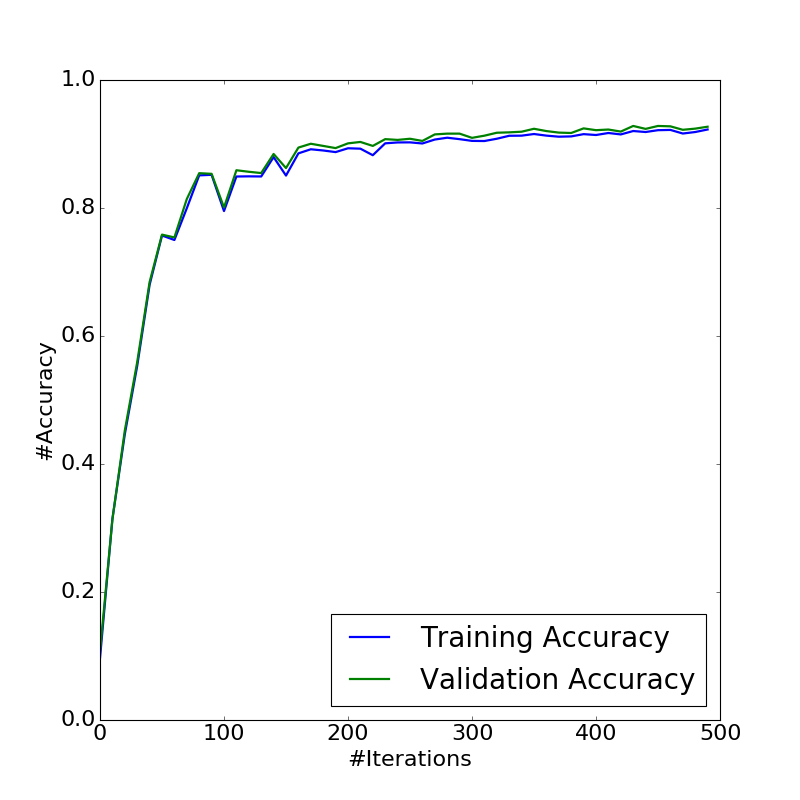

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.tick_params(axis='both', labelsize=20)
ax.set_xlabel('#Iterations', fontsize=20)
ax.set_ylabel('#Accuracy', fontsize=20)

iters = range(0, 500, 10)
ax.plot(iters, train_accs, lw=2, label='Training Accuracy')
ax.plot(iters, valid_accs, lw=2, label='Validation Accuracy')
ax.legend(loc='lower right', fontsize=25)

In [8]:
# Print the Test Accuracy
print 'Test accuracy = %.2f' % (100.0 * sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

Test accuracy = 92.62
